In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
# Load the dataset
data = pd.read_csv('/content/customer_data.csv')
print(data.head())

   customer_id  total_purchase_amount  purchase_frequency  \
0            1                   1200                   5   
1            2                    800                   3   
2            3                   1500                   7   
3            4                    500                   2   
4            5                   2500                   9   

   recency_of_purchase  average_purchase_value  types_of_products_purchased  \
0                   10                     240                            3   
1                   20                     267                            2   
2                    5                     214                            5   
3                   30                     250                            1   
4                    3                     278                            7   

   total_revenue_generated  profit_margin  predicted_future_value  age  ...  \
0                     1200             20                    1500   34  ...   


In [ ]:
print(data.describe())

       customer_id  total_purchase_amount  purchase_frequency  \
count     10.00000              10.000000           10.000000   
mean       5.50000            1100.000000            4.800000   
std        3.02765             664.997911            2.485514   
min        1.00000             400.000000            2.000000   
25%        3.25000             625.000000            3.000000   
50%        5.50000             900.000000            4.500000   
75%        7.75000            1425.000000            6.500000   
max       10.00000            2500.000000            9.000000   

       recency_of_purchase  average_purchase_value  \
count            10.000000               10.000000   
mean             16.200000              224.900000   
std              10.942273               33.197891   
min               3.000000              175.000000   
25%               7.750000              200.000000   
50%              13.500000              219.500000   
75%              23.750000          

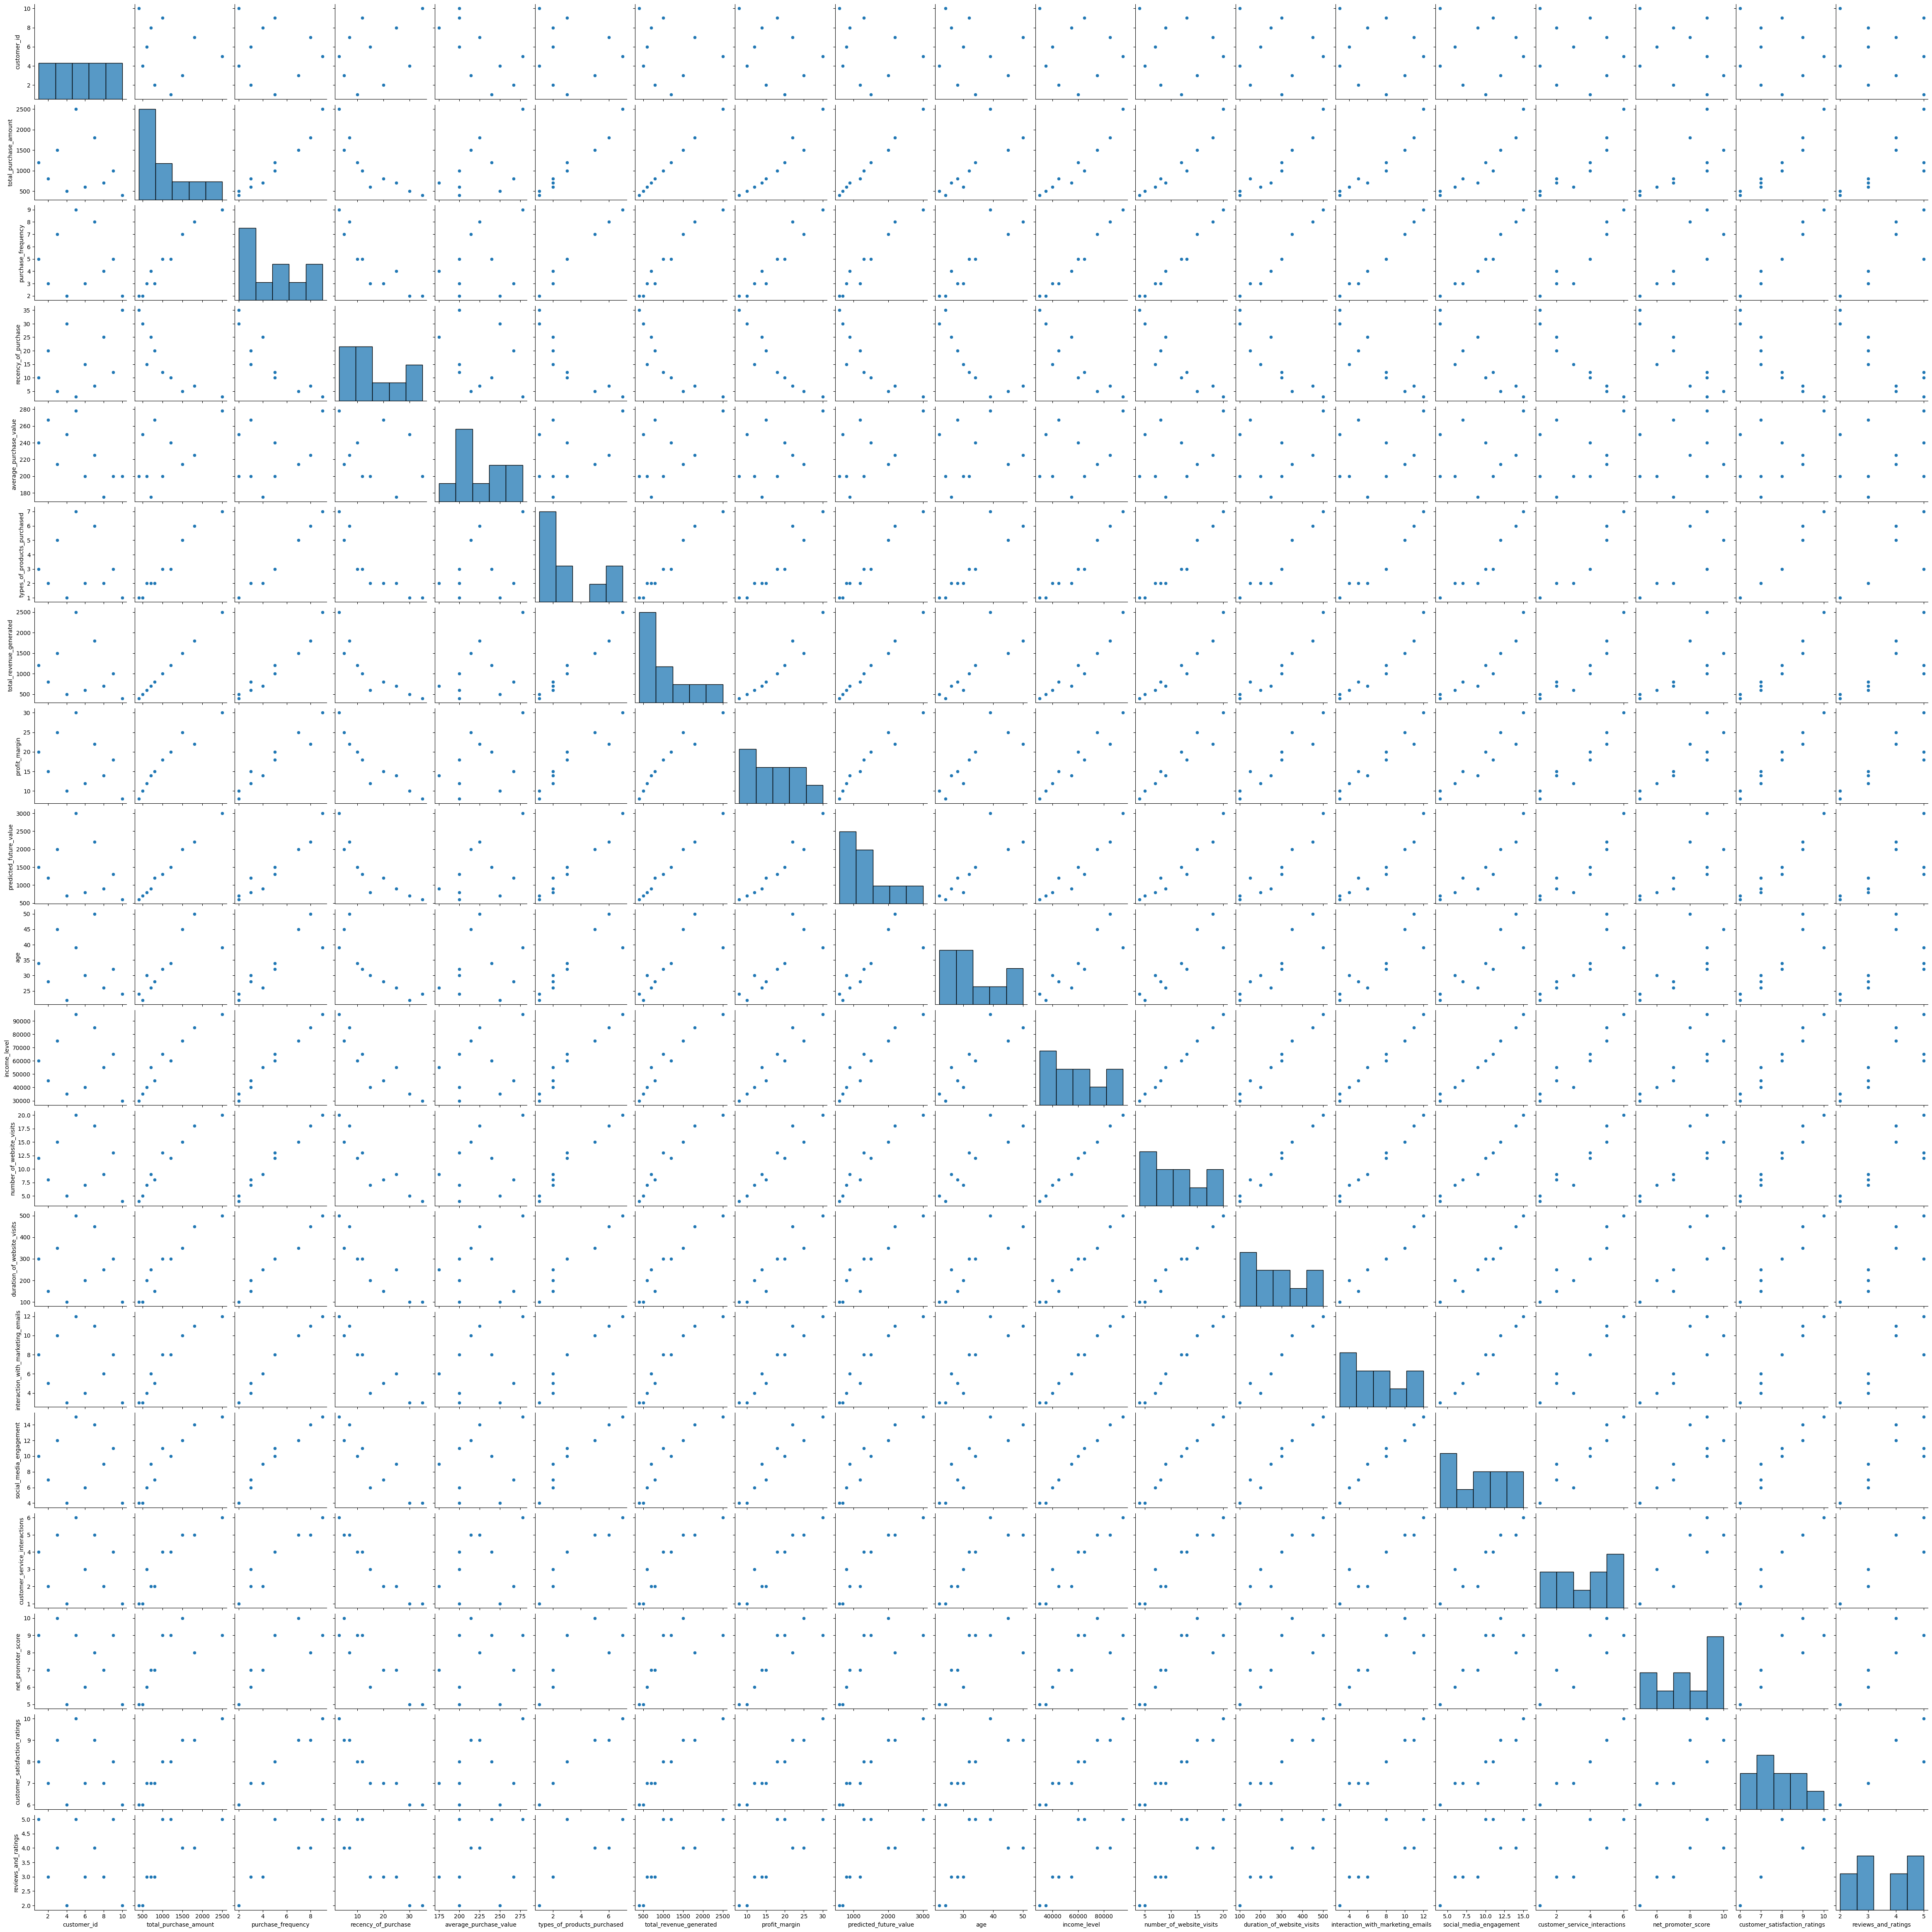

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
# Data cleaning (handle missing values, duplicates, etc.)
data = data.drop_duplicates()
data = data.dropna()# Feature selection
features = ['total_purchase_amount', 'purchase_frequency', 'recency_of_purchase',
            'average_purchase_value', 'types_of_products_purchased', 'total_revenue_generated',
            'profit_margin', 'predicted_future_value', 'age', 'income_level',
            'response_to_promotions', 'brand_loyalty_indicators', 'number_of_website_visits',
            'duration_of_website_visits', 'interaction_with_marketing_emails',
            'social_media_engagement', 'customer_service_interactions', 'net_promoter_score',
            'customer_satisfaction_ratings', 'reviews_and_ratings']


In [ ]:
categorical_features = ['gender', 'education_level', 'geographic_location', 'product_categories_of_interest', 'preferred_communication_channels']


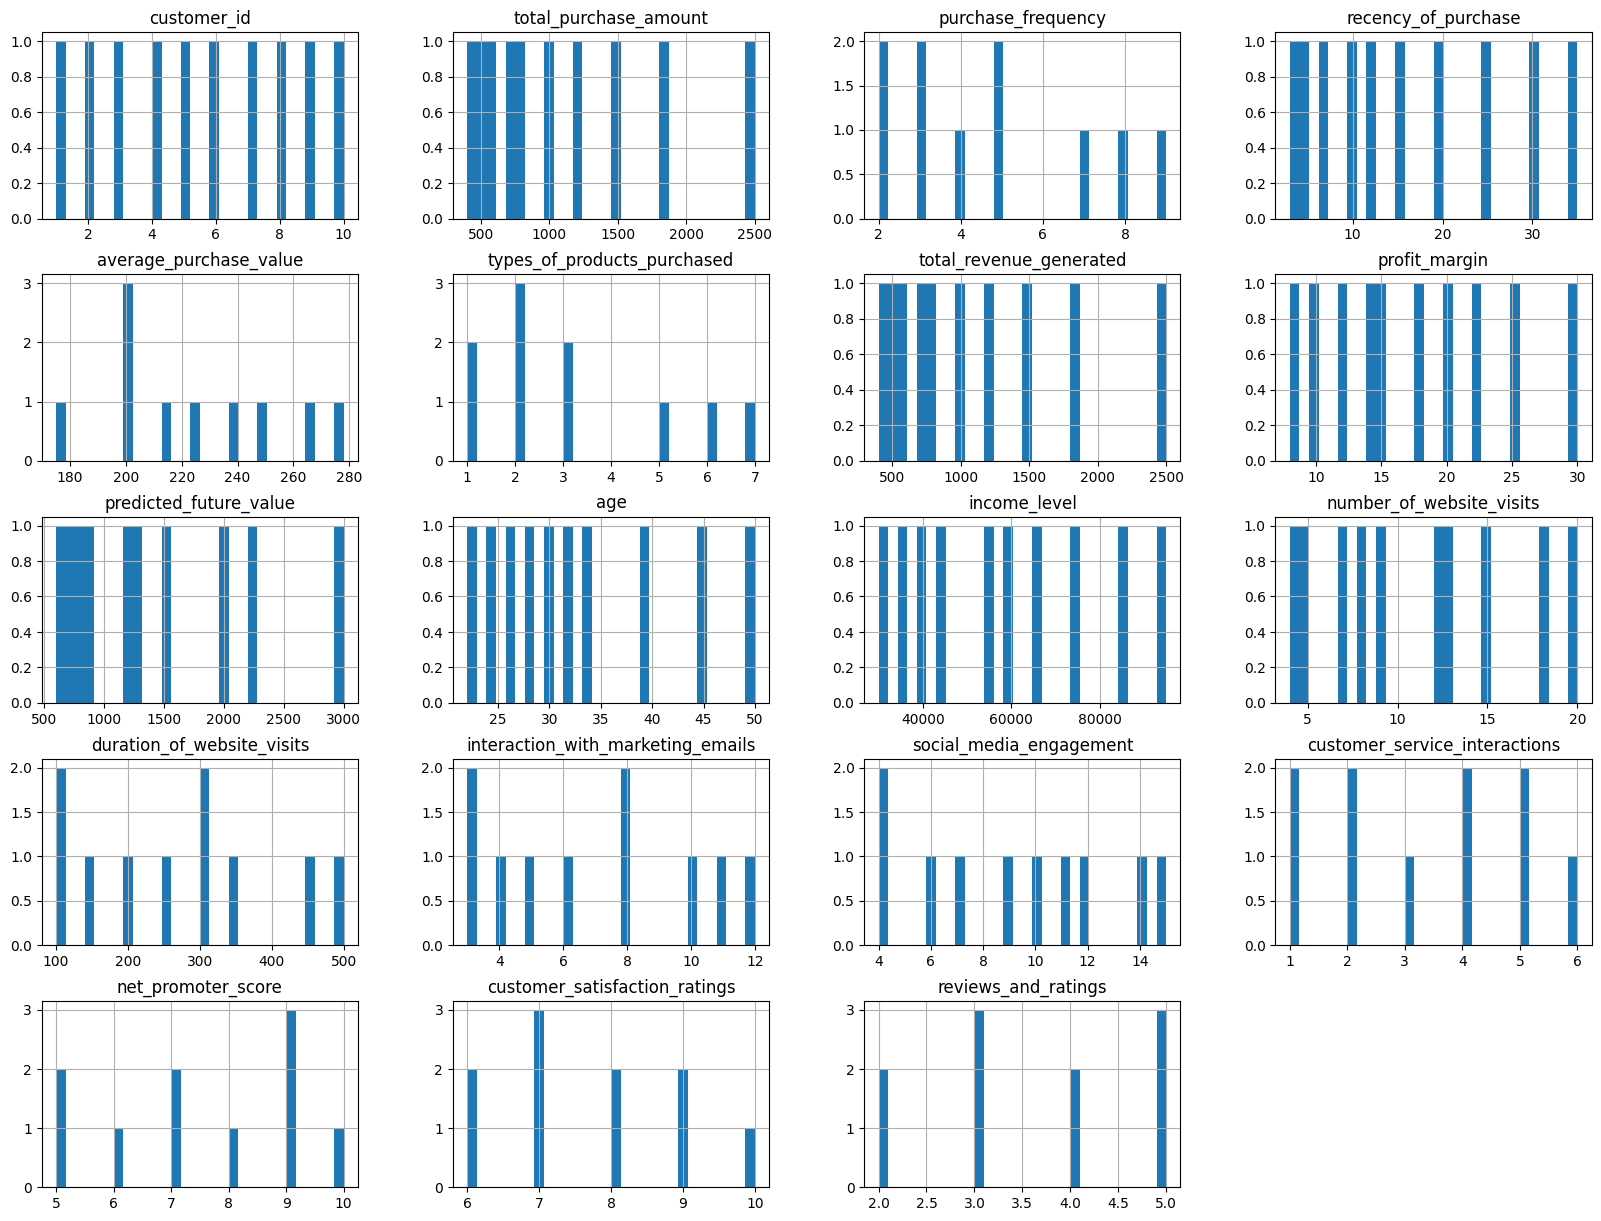

In [ ]:
# Exploratory Data Analysis (EDA)
def exploratory_data_analysis(data):
    print("Basic Information:")
    print(data.info())

    print("\nSummary Statistics:")
    print(data.describe())

    print("\nMissing Values:")
    print(data.isnull().sum())
  # Histograms for numeric features
data.hist(bins=30, figsize=(20, 15))
plt.show()

In [ ]:
exploratory_data_analysis(data)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   customer_id                        10 non-null     int64 
 1   total_purchase_amount              10 non-null     int64 
 2   purchase_frequency                 10 non-null     int64 
 3   recency_of_purchase                10 non-null     int64 
 4   average_purchase_value             10 non-null     int64 
 5   types_of_products_purchased        10 non-null     int64 
 6   total_revenue_generated            10 non-null     int64 
 7   profit_margin                      10 non-null     int64 
 8   predicted_future_value             10 non-null     int64 
 9   age                                10 non-null     int64 
 10  gender                             10 non-null     object
 11  income_level                       10 non-null     int6

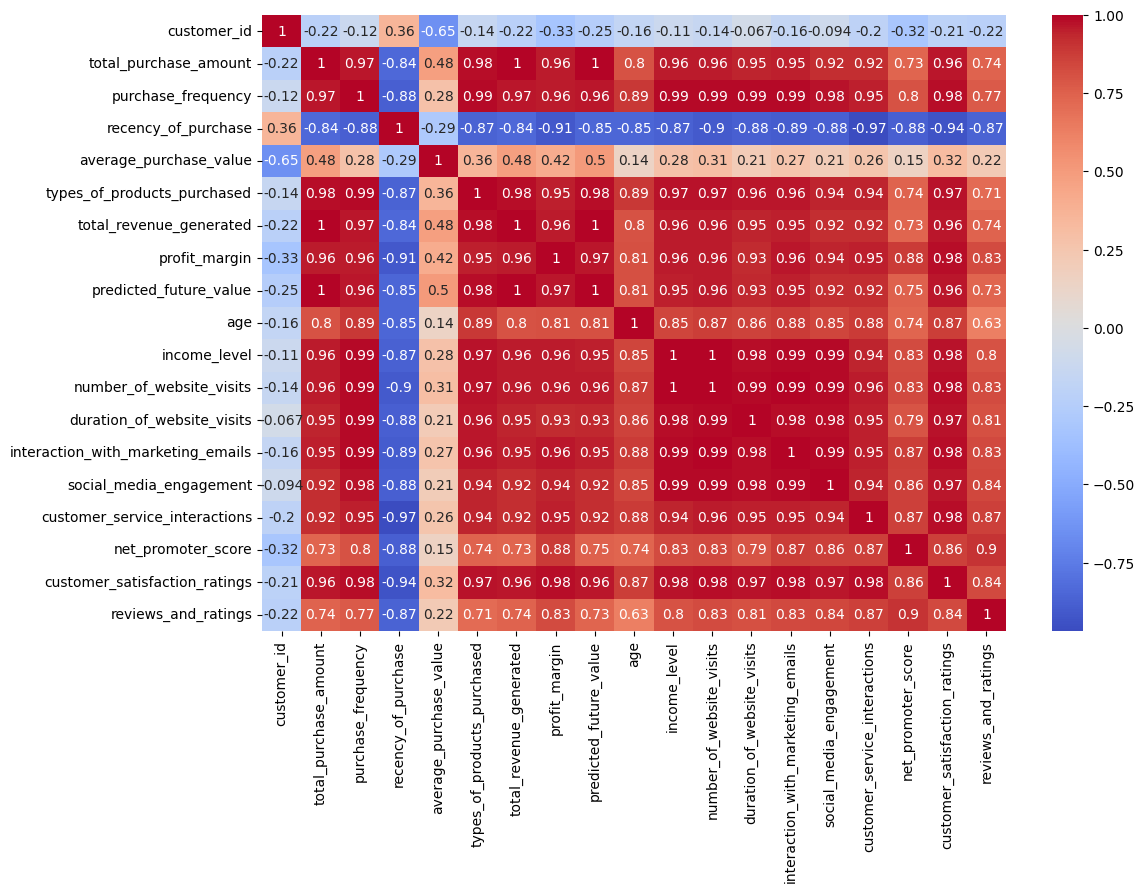

In [ ]:
data_encoded = pd.get_dummies(data, columns=categorical_features)
  # Correlation matrix
numeric_data = data_encoded.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
def preprocess_data(data, features, categorical_features):
    missing_features = [col for col in features if col not in data.columns]
    missing_categorical_features = [col for col in categorical_features if col not in data.columns]

    if missing_features:
        print(f"Missing numeric features: {missing_features}")
        return data  # Return original data for handling missing features

    if missing_categorical_features:
        print(f"Missing categorical features: {missing_features}")
        return data  # Return original data for handling missing features

    if not missing_features and not missing_categorical_features:
        # Ensure numerical columns contain only numeric values (optional)
        for feature in features:
            if data[feature].dtype == 'object':
                try:
                    data[feature] = pd.to_numeric(data[feature], errors='coerce')  # Handle non-numeric values
                except ValueError:
                    print(f"Error: Column {feature} contains non-numeric values.\nUnique values:")
                    print(data[feature].unique())

        preprocessor = ColumnTransformer(transformers=[
            ('num', StandardScaler(), features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Handle unknown categories
        ], remainder='drop')

        return preprocessor.fit_transform(data)

    else:
        print("Warning: Data contains missing features. Consider handling them before preprocessing.")
        return data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

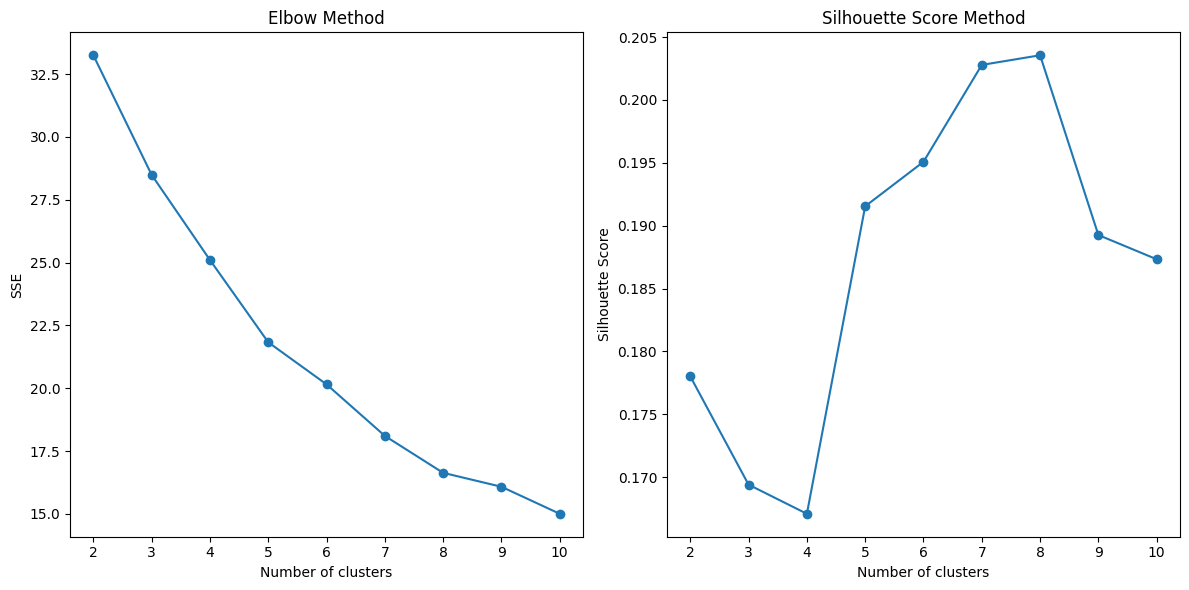

In [ ]:
def optimal_k(data_scaled):
  sse = []  # List to store the SSE values for each k
  silhouette_scores = []  # List to store the silhouette scores for each k
  k_range = range(2, 11)  # Range of k values to evaluate

  for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Create a KMeans model with k clusters
    kmeans.fit(data_scaled)  # Fit the model to the data
    sse.append(kmeans.inertia_)  # Append the SSE value to the list
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))  # Append the silhouette score to the list

  plt.figure(figsize=(12, 6))  # Create a figure for plotting

  # Subplot 1: Elbow Method
  plt.subplot(1, 2, 1)
  plt.plot(k_range, sse, marker='o')  # Plot the SSE vs k
  plt.xlabel('Number of clusters')
  plt.ylabel('SSE')
  plt.title('Elbow Method')

  # Subplot 2: Silhouette Score Method
  plt.subplot(1, 2, 2)
  plt.plot(k_range, silhouette_scores, marker='o')  # Plot the silhouette score vs k
  plt.xlabel('Number of clusters')
  plt.ylabel('Silhouette Score')
  plt.title('Silhouette Score Method')

  plt.tight_layout()  # Adjust spacing between subplots
  plt.show()  # Display the plots

# Example usage (assuming `data_scaled` is your scaled data matrix)
data_scaled = np.random.rand(100, 5)  # Example data, replace with actual scaled data
optimal_k(data_scaled)